# Opdrachten Kleuren, Histogrammen en Features 

## Student : Hussin Almoustafa

### Studentnummer : 1776495

Kies een kleurenfoto uit. Schrijf een functie die voor deze kleurenfoto één bepaalde kleurenrange behoud en de rest van de pixels grijs maakt.

In [44]:
#Import lib 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import cv2 as cv
import numpy as np
import os


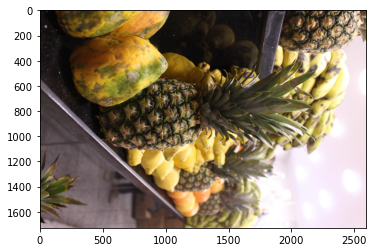

In [46]:
#import the image 

image_path = "img.jpg"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.show()

De functie *filter_color* past een kleurenfilter toe op een invoerafbeelding, waarbij alleen het kleurbereik wordt behouden dat is opgegeven door de kleurparameter en de rest van de pixels grijs wordt gemaakt. De invoerafbeelding moet de BGR-indeling hebben en de uitvoerafbeelding wordt opgeslagen in het bestandspad dat is opgegeven door de parameter output_path.

Het te behouden kleurbereik wordt bepaald door het hsv_dict-woordenboek, dat kleurnamen toewijst aan hun respectieve Hue-waardebereiken in de HSV-kleurruimte. De functie gebruikt OpenCV om de invoerafbeelding naar de HSV-kleurruimte te converteren en maakt vervolgens een binair masker om alle pixels uit te filteren die buiten het opgegeven kleurbereik vallen. De functie past dit masker vervolgens toe op zowel de originele afbeelding als een grijswaardenversie van de afbeelding en combineert deze om de uiteindelijke uitvoerafbeelding te maken.

In [47]:
def filter_color(img, color, output_path):
    """ De functie heeft de volgende parameters:

        img: het invoerbeeld in BGR-formaat
        kleur: de kleur waarop moet worden gefilterd, gespecificeerd als een tekenreeks ('rood', 'blauw' of 'groen')
        output_path: het bestandspad waar de uitvoerafbeelding wordt opgeslagen
        
        De functie retourneert niets, maar slaat de uitvoerafbeelding op in het opgegeven bestandspad."""
    
    hsv_dict = {'red': ([140,100,50],[180,255,255]), 'blue': ([80, 168, 166],[120,255,255]),
                'green':([25,10,50], [60,255,255])}

    lower = np.array(hsv_dict[color][0])
    upper = np.array(hsv_dict[color][1])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    mask_inv = cv2.bitwise_not(mask)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    res = cv2.bitwise_and(img, img, mask=mask)
    background = cv2.bitwise_and(gray, gray, mask=mask_inv)
    background = np.stack((background,)*3, axis=-1)
    added_img = cv2.add(res, background)
    cv2.imwrite(output_path, added_img)

In [48]:
img = cv2.imread('img.jpg')  #Input image 
ou = cv2.imread('grayimg.jpg') #output image
output_path = 'grayimg.jpg'
filter_color(img, 'green', output_path)
result_img = cv2.imread(output_path)

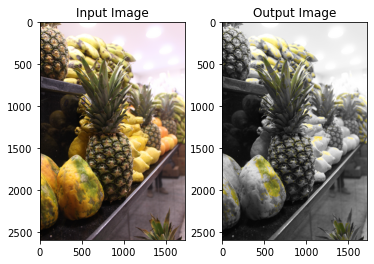

In [51]:
#Show both images 

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ou, cv2.COLOR_BGR2RGB))
plt.title('Output Image')

plt.show()


 Zoek op hoe je met matplotlib een histogram maakt. Schrijf een funtie die voor een kleurenfoto een histogram maakt van de Hue-waarden in een plaatje. Maak zowel een histogram van het originele plaatje, als van het resultaat van de functie van opdracht 1.

In [50]:
def plot_hue_histogram(img):
    # Convert the input image to the HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Extract the Hue channel
    hue_channel = hsv_img[:, :, 0]

    # Flatten the Hue channel to a 1D array
    hue_values = hue_channel.flatten()

    # Plot a histogram of the Hue values
    plt.hist(hue_values, bins=180, range=[0, 180])

    # Set the plot title and labels
    plt.title('Hue Histogram')
    plt.xlabel('Hue')
    plt.ylabel('Pixel Count')
    plt.show()

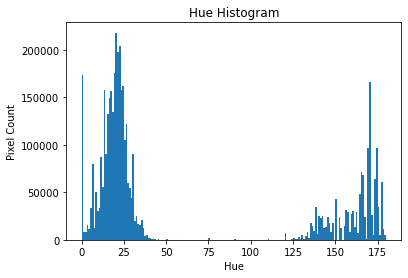

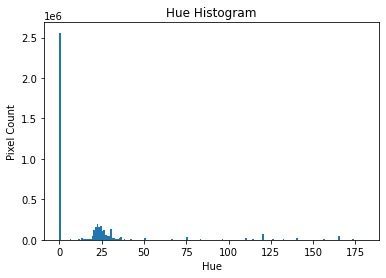

In [42]:
# Plot the Hue histogram for the original image
plot_hue_histogram(img)

# Plot the Hue histogram for the result image
plot_hue_histogram(ou)